<a href="https://colab.research.google.com/github/erickunix/slm/blob/main/SLM_projecy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


   # **1. Introduction** 

**The project aim is to undertand processes such as data claenanse, transformation and modeling of data with the goal to discover useful information which can be used for prediction model. In short, the aim of the goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).**






# Data Set Information 
**The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.**


**There are four datasets:**
####A) bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]
####B) bank-additional.csv with 10% of the examples (4119), randomly selected from 1), and 20 inputs.
####C) bank-full.csv with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs).
####D) bank.csv with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs).

## Bank client data:
**1 - age (numeric)**

**2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')**

**3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)**

**4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')**

**5 - default: has credit in default? (categorical: 'no','yes','unknown')**

**6 - housing: has housing loan? (categorical: 'no','yes','unknown')**

**7 - loan: has personal loan? (categorical: 'no','yes','unknown')**

### Related with the last contact of the current campaign:
**8 - contact: contact communication type (categorical: 'cellular','telephone')**

**9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')**

**10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')**

**11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.**

### Other attributes:
**12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)**

**13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)**

**14 - previous: number of contacts performed before this campaign and for this client (numeric)**

**15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')**
### Social and economic context attributes:
**16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)**

**17 - cons.price.idx: consumer price index - monthly indicator (numeric)**

**18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)**

**19 - euribor3m: euribor 3 month rate - daily indicator (numeric)**

**20 - nr.employed: number of employees - quarterly indicator (numeric)**
###Output variable (desired target):
**21 - y - has the client subscribed a term deposit? (binary: 'yes','no')**

In [5]:
#Installing of libraries and Importing Dataset to Colab**
!pip install csaps
!pip install pygam

     |████████████████████████████████| 1.8MB 6.7MB/s 


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns
import math
from scipy import stats
from scipy.interpolate import interp1d
import csaps
import copy
import statsmodels.api as sm
from pygam import LogisticGAM, l, s, f
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [7]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

**Mounting Gdrive to Colab**

In [8]:
!git clone https://github.com/erickunix/slm.git

Cloning into 'slm'...
remote: Enumerating objects: 136, done.
remote: Counting objects: 100% (136/136), done.
remote: Compressing objects: 100% (133/133), done.
remote: Total 136 (delta 62), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (136/136), 2.39 MiB | 4.69 MiB/s, done.
Resolving deltas: 100% (62/62), done.


**Importing Dataset to Colab**

In [9]:
df = pd.read_csv('/content/slm/bank-additional-full.csv', sep = ';')

In [10]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


# **2. Cleananse and Processing Data**

Change Name and Value of our target [Cloumn 21 - y - has the client subscribed a term deposit? (binary: 'yes','no']

In [11]:
df['deposit'] = df['y'].replace({'yes': 1, 'no': 0})
df =  df.drop(['y'], axis = 1)
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


In [12]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


In [13]:
#delete cause of values  - 999
df = df.drop("pdays", axis = 1)

In [14]:
print(" Number of Rows {rows} ".format(rows = len(df)))

 Number of Rows 41188 


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  previous        41188 non-null  int64  
 13  poutcome        41188 non-null  object 
 14  emp.var.rate    41188 non-null  float64
 15  cons.price.idx  41188 non-null  float64
 16  cons.conf.idx   41188 non-null  float64
 17  euribor3m       41188 non-null 

###Number of Missing values in any Column

In [16]:
missing_values = df.isnull().sum()
missing_values.sum()

0

#**3. Exploratory Data Analysis**

In [17]:

cat_cols = df.select_dtypes(include=object).columns.tolist()
(pd.DataFrame(
    df[cat_cols]
    .melt(var_name='column', value_name='value')
    .value_counts())
.rename(columns={0: 'counts'})
.sort_values(by=['column', 'counts']))

counts
column      value                      
contact     telephone             15044
            cellular              26144
day_of_week fri                    7827
            tue                    8090
            wed                    8134
            mon                    8514
            thu                    8623
default     yes                       3
            unknown                8597
            no                    32588
education   illiterate               18
            unknown                1731
            basic.6y               2292
            basic.4y               4176
            professional.course    5243
            basic.9y               6045
            high.school            9515
            university.degree     12168
housing     unknown                 990
            no                    18622
            yes                   21576
job         unknown                 330
            student                 875
            unemployed             1014
            housemaid              1060
            self-employed          1421
            entrepreneur           1456
            retired                1720
            management             2924
            services               3969
            technician             6743
            blue-collar            9254
            admin.                10422
loan        unknown                 990
            yes                    6248
            no                    33950
marital     unknown                  80
            divorced               4612
            single                11568
            married               24928
month       dec                     182
            mar                     546
            sep                     570
            oct                     718
            apr                    2632
            nov                    4101
            jun                    5318
            aug                    6178
            jul                    7174
            may                   13769
poutcome    success                1373
            failure                4252
            nonexistent           35563

In [18]:
test = pd.value_counts(df.job)
test

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [19]:
test = pd.value_counts(df.education)
un = pd.Series({'nunique': len(test), 'unique values': test.index.tolist()})
test.append(un)


university.degree                                                  12168
high.school                                                         9515
basic.9y                                                            6045
professional.course                                                 5243
basic.4y                                                            4176
basic.6y                                                            2292
unknown                                                             1731
illiterate                                                            18
nunique                                                                8
unique values          [university.degree, high.school, basic.9y, pro...
dtype: object

In [20]:
onnum =['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month','poutcome']
for cat_column in onnum:
 value_counts = df[onnum].value_counts()

### Graph with Frequency of Values per Column

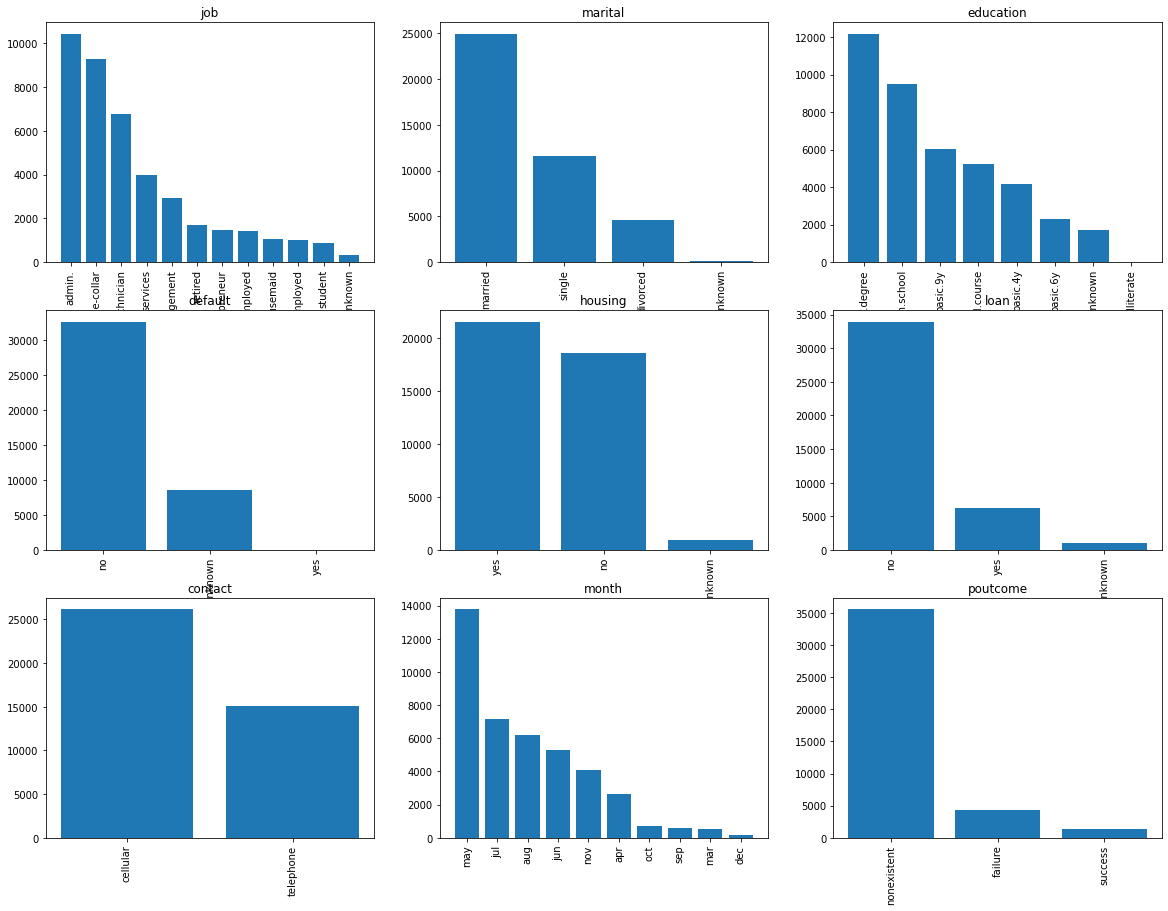

In [21]:
cat_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month','poutcome']

fig, axs = plt.subplots(3, 3, sharex=False, sharey=False, figsize=(20, 15))

counter = 0
for cat_column in cat_columns:
    value_counts = df[cat_column].value_counts()
    
    trace_x = counter // 3
    trace_y = counter % 3
    x_pos = np.arange(0, len(value_counts))
    
    axs[trace_x, trace_y].bar(x_pos, value_counts.values, tick_label = value_counts.index)
    
    axs[trace_x, trace_y].set_title(cat_column)
    
    for tick in axs[trace_x, trace_y].get_xticklabels():
        tick.set_rotation(90)
    
    counter += 1

plt.show()

## One hot encoding


In [22]:
df['job'] = df['job'].replace({'housemaid':0, 'services':1, 'admin.':2, 'blue-collar':3, 'technician':4,
       'retired':5, 'management':6, 'unemployed':7, 'self-employed':8, 'unknown':9,
       'entrepreneur':10, 'student':11})

In [23]:
df['marital'] = df['marital'].replace({'married':0, 'single':1, 'divorced':2, 'unknown':3})

In [24]:
df['education'] = df['education'].replace({'basic.4y':0, 'high.school':1, 'basic.6y':2, 'basic.9y':3,
       'professional.course':4, 'unknown':5, 'university.degree':6,
       'illiterate':7})

In [25]:
df['default'] = df['default'].replace({'no':0, 'unknown':1, 'yes':2})

In [26]:
df['housing'] = df['housing'].replace({'no':0, 'unknown':1, 'yes':2})

In [27]:
df['loan'] = df['loan'].replace({'no':0, 'unknown':1, 'yes':2})

In [28]:
df['contact'] = df['contact'].replace({'telephone':0, 'cellular':1})

In [29]:
df['month'] = df['month'].replace({'may':0, 'jun':1, 'jul':2, 'aug':3, 'oct':4, 'nov':5, 'dec':6, 'mar':7, 'apr':8,
       'sep':9})

In [30]:
df['poutcome'] = df['poutcome'].replace({'nonexistent':0, 'failure':1, 'success':2})

In [31]:
df['day_of_week'] = df['day_of_week'].replace({'mon':0, 'tue':1, 'wed':2, 'thu':3, 'fri':4})

## Outliers


In [32]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'deposit'],
      dtype='object')

In [33]:
non_cat_columns = ['age', 'duration', 'campaign',
       'previous', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed']

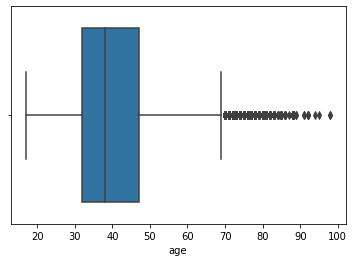

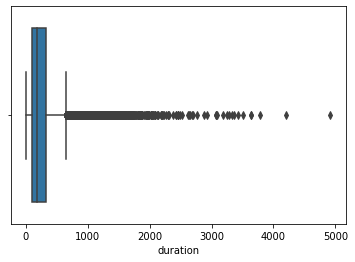

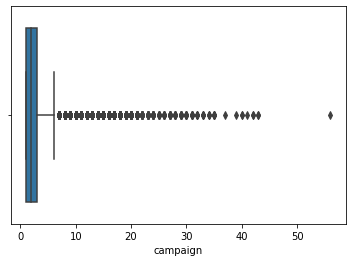

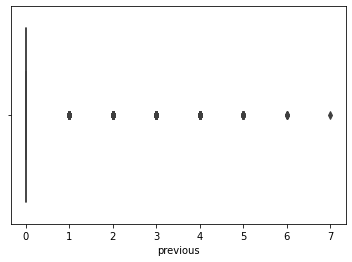

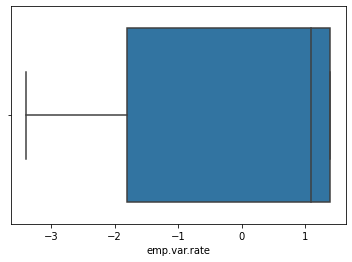

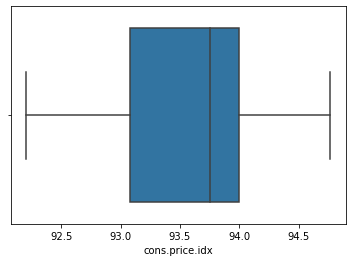

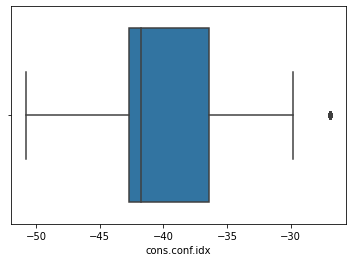

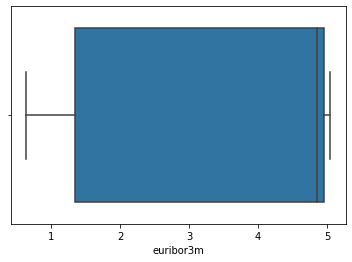

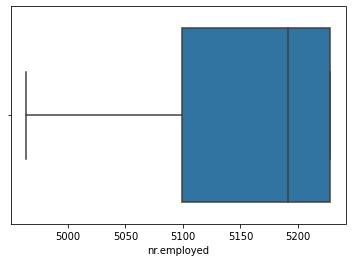

In [34]:
for col in non_cat_columns:
  plt.figure()
  sns.boxplot(x = df[col])

In [35]:
for col in non_cat_columns:   
  df.loc[(np.abs(stats.zscore(df[col])) > 3), col] = np.nan
  median = df[col].dropna().median()
  df[col].fillna(median,inplace=True)

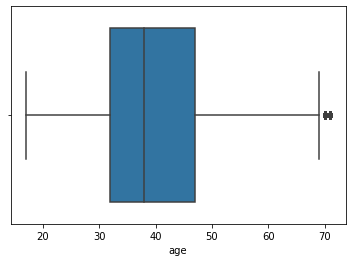

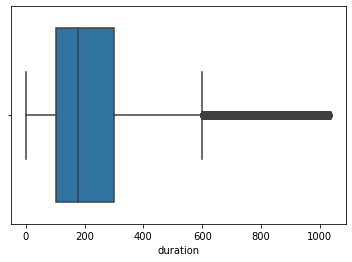

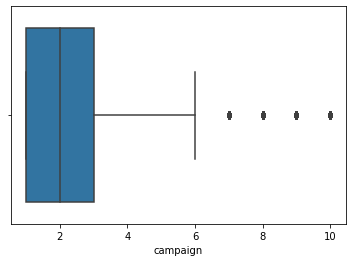

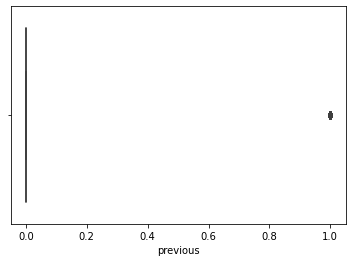

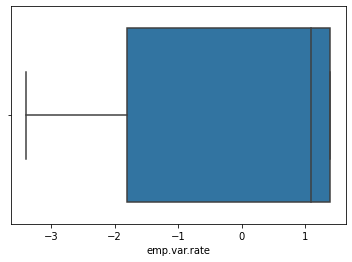

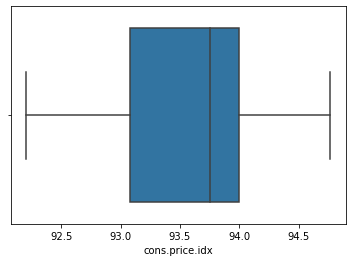

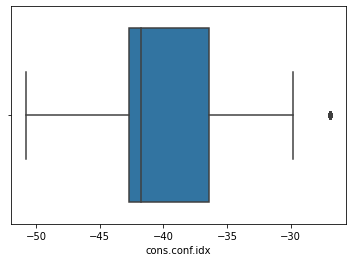

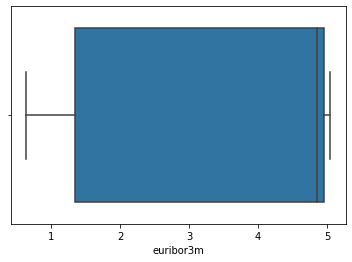

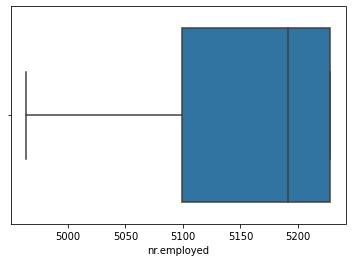

In [36]:
for col in non_cat_columns:
  plt.figure()
  sns.boxplot(x = df[col])

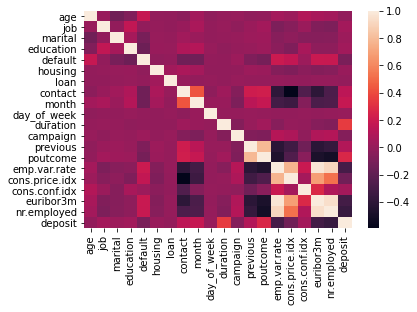

In [37]:
import seaborn as sns;

corr  = df.corr()
ax = sns.heatmap(corr)


## Dimensionality reduction techniques (PCA) and clusterization


In [38]:
X = df.drop('deposit', axis = 1)
X = X.values

In [39]:
 from sklearn.decomposition import PCA
 pca = PCA(n_components=2)

In [40]:
pca_res = pca.fit_transform(X)

In [41]:
import plotly.express as px
fig = px.scatter(pca_res, x=0, y=1, color=df['deposit'])
fig.show()

In [42]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2)
kmeans.fit(pca_res)
y_kmeans = kmeans.predict(pca_res)

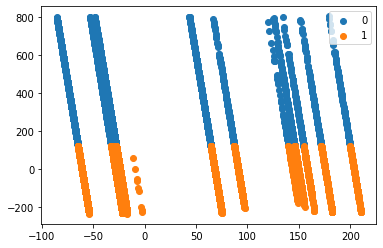

In [43]:
for i in np.unique(y_kmeans):
    plt.scatter(pca_res[y_kmeans == i , 1] , pca_res[y_kmeans == i , 0] , label = i)
plt.legend()
plt.show()

#**4. Data split, standarization and models**


In [44]:
from sklearn import preprocessing, model_selection

X = df.drop('deposit', axis=1)
y = df['deposit']
X_train, X_test, y_train, y_test = train_test_split(X, y)



In [45]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression

pipe = make_pipeline(preprocessing.StandardScaler(), LogisticRegression())
pipe.fit(X_train, y_train) 
pipe.score(X_test, y_test)

0.9030785665727882

In [46]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, pipe.predict(X_test))

0.09692143342721181

In [47]:
from sklearn.ensemble import RandomForestClassifier


forest_model = make_pipeline(preprocessing.StandardScaler(), RandomForestClassifier(max_depth=10, random_state=0))
forest_model.fit(X_train, y_train) 
forest_model.score(X_test, y_test)


0.909876663105759

In [48]:
from sklearn.naive_bayes import GaussianNB

naive_bayes_model = make_pipeline(preprocessing.StandardScaler(), GaussianNB())
naive_bayes_model.fit(X_train, y_train) 
naive_bayes_model.score(X_test, y_test)

0.8020782752257939

In [49]:
from sklearn import svm

svm_model = make_pipeline(preprocessing.StandardScaler(), svm.SVC(probability=True))
svm_model.fit(X_train, y_train) 
svm_model.score(X_test, y_test)

0.9055064581917063

## Hyper-parameter tuning

## 1.Logistic regression

In [50]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline

param_grid = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
              'logisticregression__max_iter':list(range(100,800,100)),
              'logisticregression__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

pipe = make_pipeline(preprocessing.StandardScaler(), LogisticRegression())
grid = GridSearchCV(pipe, param_grid, cv=5)



In [51]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('standardscaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('logisticregression',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=100,
                                                           multi_clas

In [52]:
logistic_regression_model = grid.best_estimator_

In [53]:
results = grid.best_estimator_.score(X_test, y_test)

In [54]:
results


0.9022045255899777

In [55]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, grid.best_estimator_.predict(X_test))

0.09779547441002234

In [56]:
grid.best_params_

{'logisticregression__C': 0.1,
 'logisticregression__max_iter': 100,
 'logisticregression__solver': 'newton-cg'}

## 2.Random Forest

In [57]:


param_grid = {'randomforestclassifier__bootstrap': [True, False],
 'randomforestclassifier__max_depth':[2, 4, 6, 8, 10, 12, 20],
 'randomforestclassifier__max_features': ['auto', 'sqrt'],
 'randomforestclassifier__min_samples_leaf': [1, 2, 4],
 'randomforestclassifier__min_samples_split': [2, 5, 10],
 'randomforestclassifier__n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [58]:
pipe = make_pipeline(preprocessing.StandardScaler(), RandomForestClassifier())
grid = GridSearchCV(pipe, param_grid, cv=5)


In [59]:
grid.fit(X_train, y_train)

KeyboardInterrupt: ignored

In [ ]:
random_forest_model = grid.best_estimator_

In [ ]:
results = grid.best_estimator_.score(X_test, y_test)

In [ ]:
results

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, grid.best_estimator_.predict(X_test))

In [ ]:
grid.best_params_

## 3.Gaussian Naive Bayes

In [ ]:
pipe = make_pipeline(preprocessing.StandardScaler(), GaussianNB())

In [ ]:
params_NB = {'gaussiannb__var_smoothing': np.logspace(0,-9, num=100)}

In [ ]:
results = grid.best_estimator_.score(X_test, y_test)

In [ ]:
results

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, grid.best_estimator_.predict(X_test))

In [ ]:
grid.best_params_

## 3.SVM 

In [ ]:
param_grid = {'svc__C': [0.1, 1, 10, 100, 1000], 
              'svc__gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'svc__kernel': ['rbf']} 

In [ ]:
pipe = make_pipeline(preprocessing.StandardScaler(), svm.SVC())

In [ ]:
results = grid.best_estimator_.score(X_test, y_test)

In [ ]:
results

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, grid.best_estimator_.predict(X_test))

In [ ]:
grid.best_params_

#**5. Model assessment**

Models created in a project are:


1.   Logistic Regression 
2.   Random Forest
3.   Gaussian Naive Bayes
4.   SVM



Before hyper-parameter tunning the model that got best score was Random Forest Classifier. However, differences in scores for created models were not significant (besides Gaussian Naive Bayes all the models got scores above 90%)

In [ ]:
lr_probs = logistic_regression_model.predict_proba(X_test)

In [ ]:
lr_probs = lr_probs[:, 1]

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

lr_auc = roc_auc_score(y_test, lr_probs)

In [ ]:
print('Logistic: ROC AUC=%.3f' % (lr_auc))

In [ ]:
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

In [ ]:
from matplotlib import pyplot

pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')

In [ ]:
rf_probs = forest_model.predict_proba(X_test)

In [ ]:
rf_probs = rf_probs[:, 1]

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

rf_auc = roc_auc_score(y_test, rf_probs)

In [ ]:
print('Random Forest: ROC AUC=%.3f' % (rf_auc))

In [ ]:
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)

In [ ]:
from matplotlib import pyplot

pyplot.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest')

In [ ]:
gnb_probs = naive_bayes_model.predict_proba(X_test)

In [ ]:
gnb_probs = gnb_probs[:, 1]

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

gnb_auc = roc_auc_score(y_test, gnb_probs)

In [ ]:
print('Gaussian Naive Bayes: ROC AUC=%.3f' % (rf_auc))

In [ ]:
gnb_fpr, gnb_tpr, _ = roc_curve(y_test, gnb_probs)

In [ ]:
from matplotlib import pyplot

pyplot.plot(gnb_fpr, gnb_tpr, marker='.', label='Gaussian Naive Bayes')

In [ ]:
svm_probs = svm_model.predict_proba(X_test)

In [ ]:
svm_probs = svm_probs[:, 1]

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

svm_auc = roc_auc_score(y_test, svm_probs)

In [ ]:
print('SVM: ROC AUC=%.3f' % (rf_auc))

In [ ]:
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)

In [ ]:
from matplotlib import pyplot

pyplot.plot(svm_fpr, svm_tpr, marker='.', label='SVM')

ROC curves for all the models - it's visible that Random Forest Classifier was the best model for given dataset.

In [ ]:
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
pyplot.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest')
pyplot.plot(gnb_fpr, gnb_tpr, marker='.', label='Gaussian Naive Bayes')
pyplot.plot(svm_fpr, svm_tpr, marker='.', label='SVM')
pyplot.legend()
# show the plot
pyplot.show()

#**6. Summary**

Preprocessing of the data did not bring any major challenges. There wasn't any missing values, so the only things that needed to be done were one-hot encoding and handing outliers which were replaced with average value for a given column.
Something that may have been explored further was the z-score threshold value that was set to most commonly used "3" to determine if a value is an outlier. It could be worth to check if increasing or decreasing this value would affect models' performances. 

Additionaly, explorational analysis allowed to discover that values in p_days column were exacty the same for each row, so this column got removed. 

The biggest challenge was hyper-parameter tunning. Each model has many different hyper-parameters and runing cross-validation for all those different values was extremely time-consuming. 

Besides, hyper-parameter tunning didn't really always lead to improvement. For Logistic Regression model's score was slightly lower.

Moreover, what could have been explored was different standarization algorithms or adding PCA to the pipelines.
